In [1]:
import os
if __name__ == "__main__":
    os.chdir("..")

## Import Librarires

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO
from utils.data_class import Product

In [13]:
model = YOLO("models/product.pt")

In [14]:
cvt_rgb = lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


0: 96x128 88 objects, 17.4ms
Speed: 3.0ms preprocess, 17.4ms inference, 1.0ms postprocess per image at shape (1, 3, 96, 128)


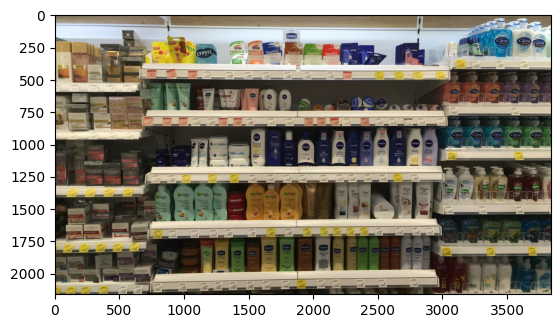

In [19]:
def detect_product(img):
    results = model(img)
    products = [Product(box) for box in  results[0].boxes.xyxy]
    return products

if __name__ == "__main__":
    img = cv2.imread("data/2.jpg")
    products = detect_product(img)
    plt.imshow(cvt_rgb(img))

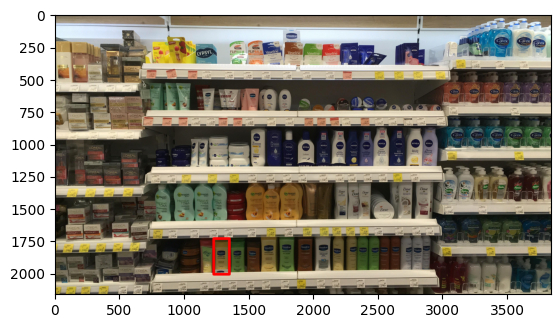

In [20]:
def draw_product(img, product):
    cv2.rectangle(img,product.p1, product.p2, color=(0,0,255), thickness=20)
    return img

if __name__ == "__main__":
    shelf = products[4] 
    img_draw = draw_product(img.copy(), shelf)
    plt.imshow(cvt_rgb(img_draw))

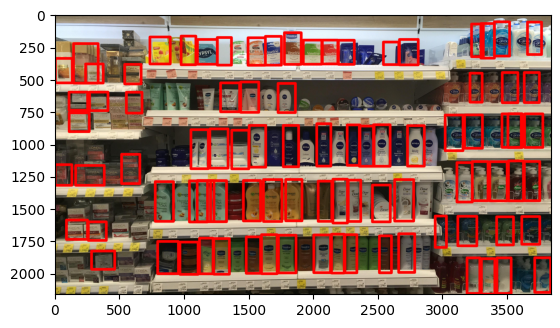

In [21]:
def draw_products(img, products):
    img_draw = img.copy()

    for product in products:
        draw_product(img_draw, product)
    return img_draw

if __name__ == "__main__":
    res = draw_products(img, products)
    plt.imshow(cvt_rgb(res))